In [ ]:
# pip install -i https://test.pypi.org/simple/ pontiPy==2.0.0

In [1]:
from pontiPy import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Testing/test.csv", index_col=0)

In [133]:
display(df)

,1,2,3,4
1,1,0,2,0
2,0,3,3,0
3,2,0,3,0
4,0,3,0,3


In [134]:
test = pontiPy(df)

In [162]:
df_plot = df.copy(deep=True)
# delete sum column and row
df_plot.loc["Miss"] = test.column_disagreement('CONTINGENCY')[:-1]
df_plot.loc["False Alarm"] = test.row_disagreement('CONTINGENCY')[:-1]

df_plot

,1,2,3,4
1,1,0,2,0
2,0,3,3,0
3,2,0,3,0
4,0,3,0,3
Miss,2,3,5,0
False Alarm,2,3,2,3


In [329]:
d = {'1': ['Hit', '0', '0', '0', '0', '0'], '2': ['1', '2', '3', '4', '0','0'], 
     '3': ['1', '2', '3', '4','0','0'], '4': ['1', '2', '3', '4','0','0']}
d = pd.DataFrame(data=d)
d

,1,2,3,4
0,Hit,1,1,1
1,0,2,2,2
2,0,3,3,3
3,0,4,4,4
4,0,0,0,0
5,0,0,0,0


In [358]:
import plotly.express as px


fig = px.bar(df_plot, y=df_plot.index, x=df_plot.columns,
             height=350, orientation='h',width=600,
             opacity = 1, color_discrete_sequence=px.colors.qualitative.Set1,
             template="simple_white")


layout = fig.update_layout(
    
    font=dict(family="Rockwell", size=12),
    
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    
    yaxis = dict(autorange="reversed",type='category', title='Table Feature',
               title_font=dict(size=12, family='Rockwell', color='black')),
    
    xaxis = dict(title='Entry size as number of Observations', dtick = 1,
                 title_font=dict(size=12, family='Rockwell', color='black')),
    
    legend = dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right",
                  x=0.8, title = '',
                  font=dict(family="Rockwell", size=12, color="black"))
)

# fig.update_layout(hovermode="x unified")
fig.show()

In [218]:
# Discrete palettes available with plotly
import plotly.express as px

fig = px.colors.qualitative.swatches()
fig.show()

## Matplotlib

[[1, 0, 2, 0], [0, 3, 3, 0], [2, 0, 3, 0], [0, 3, 0, 3]]

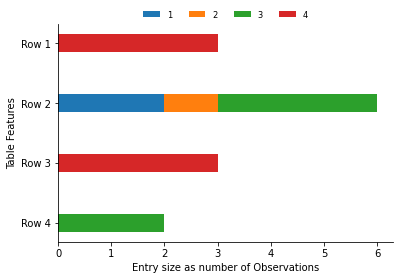

In [306]:
labels = ['Row 4', 'Row 3', 'Row 2', 'Row 1']
row_1 = df_list[3]
row_2 = df_list[2]
row_3 = df_list[1]
row_4 = df_list[0]
width = 0.3       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, row_4, width, label='1')
ax.barh(labels, row_3, width, left=row_4, label='2')
ax.barh(labels, row_2, width, left=row_3, label='3')
ax.barh(labels, row_1, width, left=row_2, label='4',)

ax.set_ylabel('Table Features')
ax.set_xlabel('Entry size as number of Observations')
ax.legend(loc='upper center', fontsize='small', ncol=4, bbox_to_anchor=(0.5,1.10), frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()